In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv("../data/processed/data.csv", index_col=0)

In [3]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

In [4]:
new_columns = {
    "T": "temperature",
    "Po": "station_level_pressure",
    "P": "sea_level_pressure",
    "U": "humidity",
    "Td": "dew_point",
}

data.rename(columns=new_columns, inplace=True)

In [5]:
data

,temperature,station_level_pressure,sea_level_pressure,humidity,dew_point,water_level
date,,,,,,
2021-01-01,-12.0250,754.5500,773.100,72.750,-16.1250,170.0
2021-01-02,-27.6500,768.1000,788.250,77.750,-30.3250,171.5
2021-01-03,-24.7500,769.7500,789.625,77.500,-27.5500,173.0
2021-01-04,-22.1500,768.4000,788.025,73.750,-25.6000,173.0
2021-01-05,-24.8500,776.2500,796.225,67.500,-29.1750,173.0
...,...,...,...,...,...,...
2024-05-08,12.4625,745.4375,762.150,37.750,-3.1125,201.0
2024-05-09,12.2500,749.0375,765.875,34.375,-3.8375,200.0
2024-05-10,13.9125,745.5750,762.225,35.875,-3.4125,197.0


In [6]:
data.to_csv('../data/processed/renamed_data.csv')

### График температур

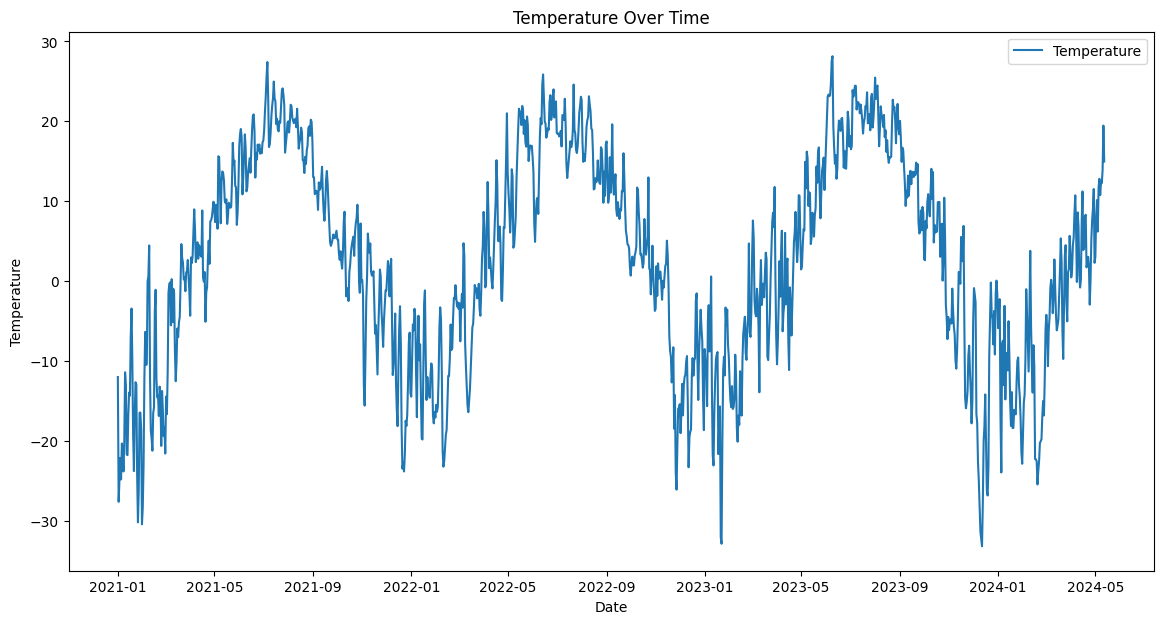

In [63]:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['temperature'], label='Temperature')
plt.legend()
plt.title("Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.show()

### График давления

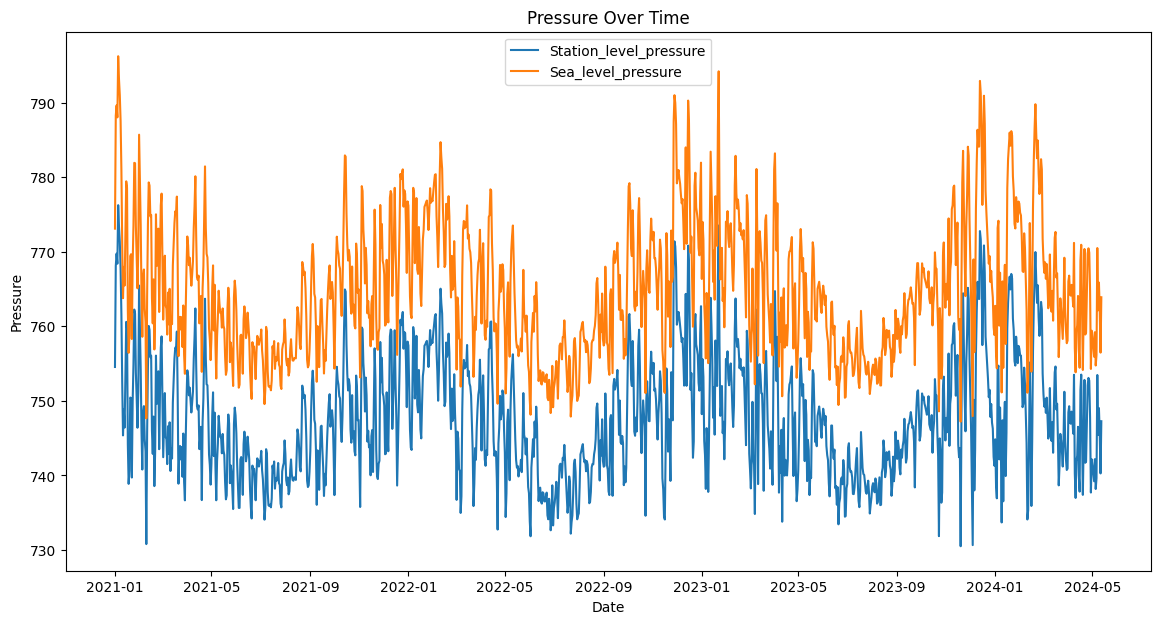

In [64]:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['station_level_pressure'], label='Station_level_pressure')
plt.plot(data.index, data['sea_level_pressure'], label='Sea_level_pressure')
plt.legend()
plt.title("Pressure Over Time")
plt.xlabel("Date")
plt.ylabel("Pressure")
plt.show()

### График влажности

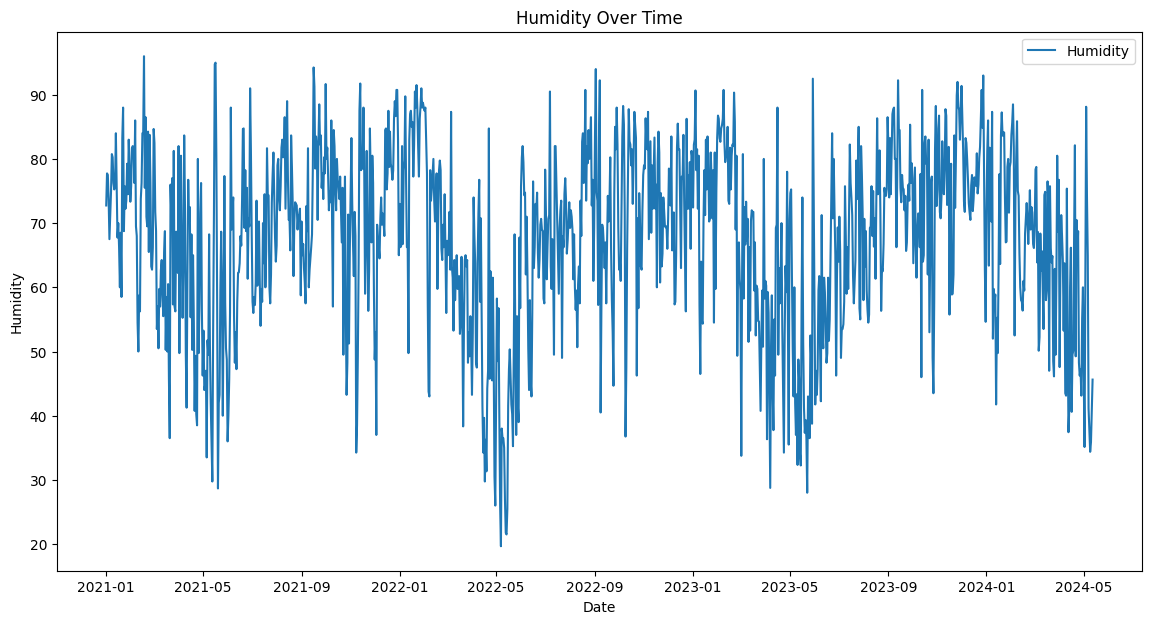

In [65]:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['humidity'], label='Humidity')
plt.legend()
plt.title("Humidity Over Time")
plt.xlabel("Date")
plt.ylabel("Humidity")
plt.show()

### График температуры точки росы

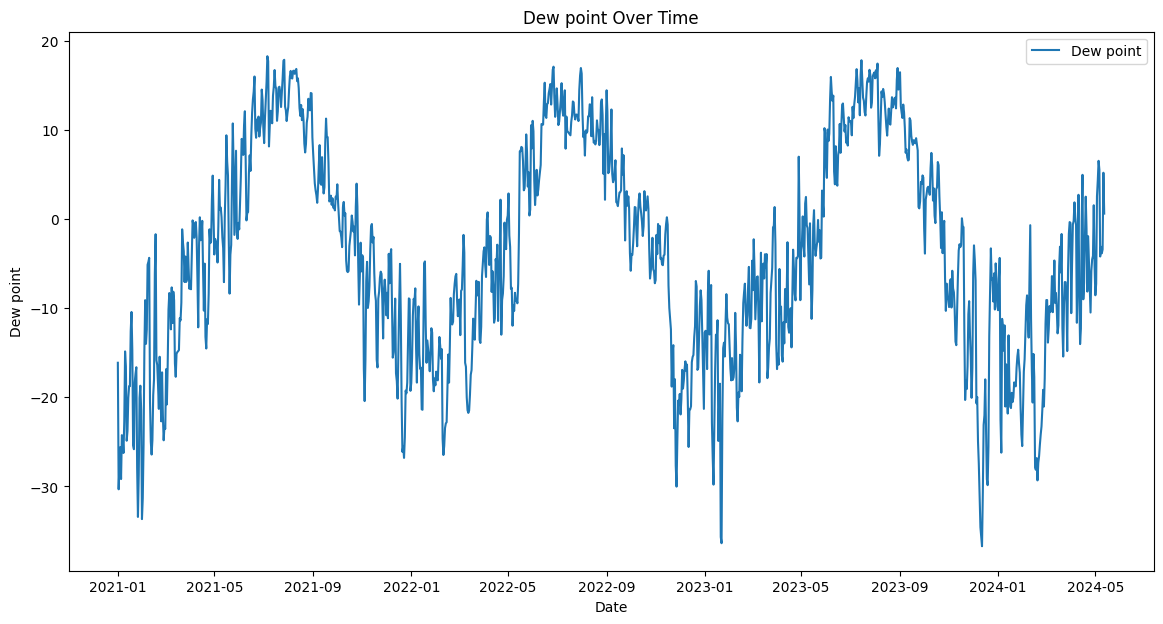

In [66]:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['dew_point'], label='Dew point')
plt.legend()
plt.title("Dew point Over Time")
plt.xlabel("Date")
plt.ylabel("Dew point")
plt.show()

### График уровня воды

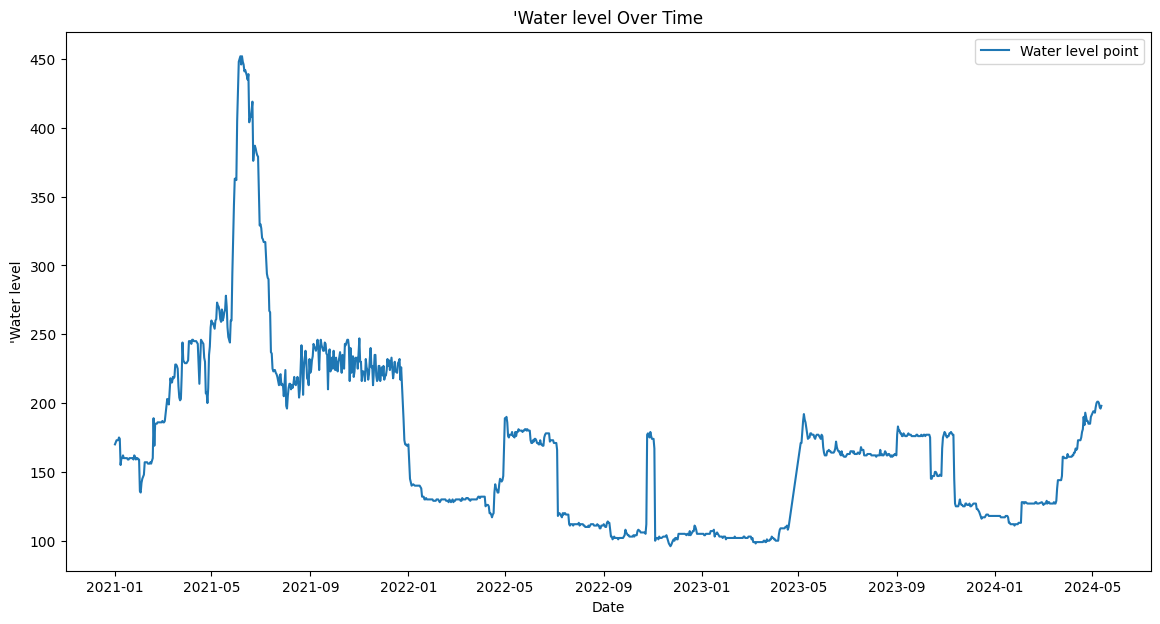

In [67]:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['water_level'], label='Water level point')
plt.legend()
plt.title("'Water level Over Time")
plt.xlabel("Date")
plt.ylabel("'Water level")
plt.show()

### Распределения признаков

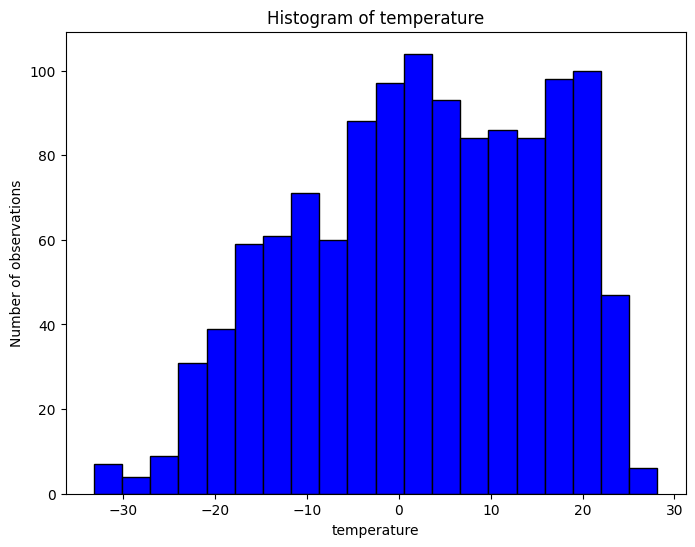

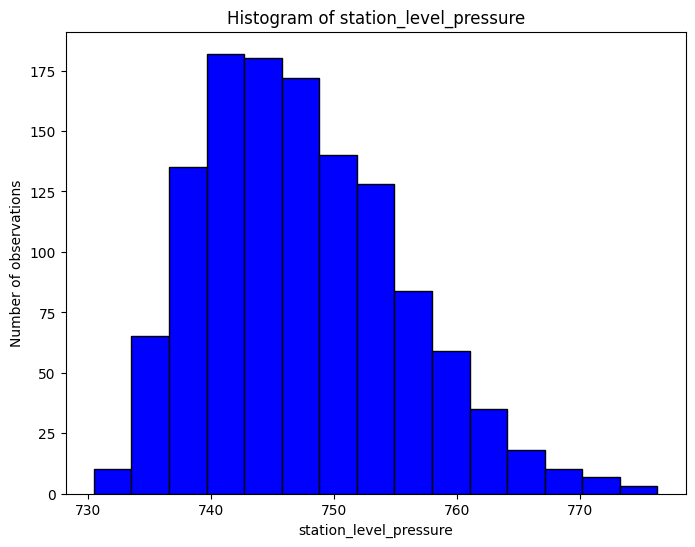

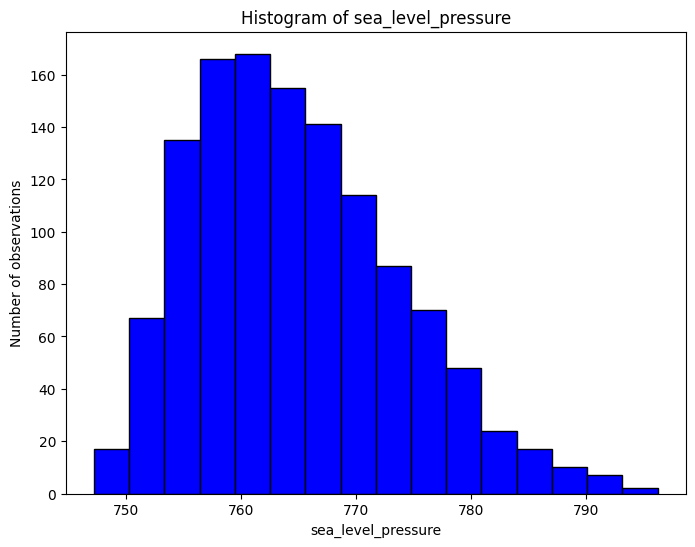

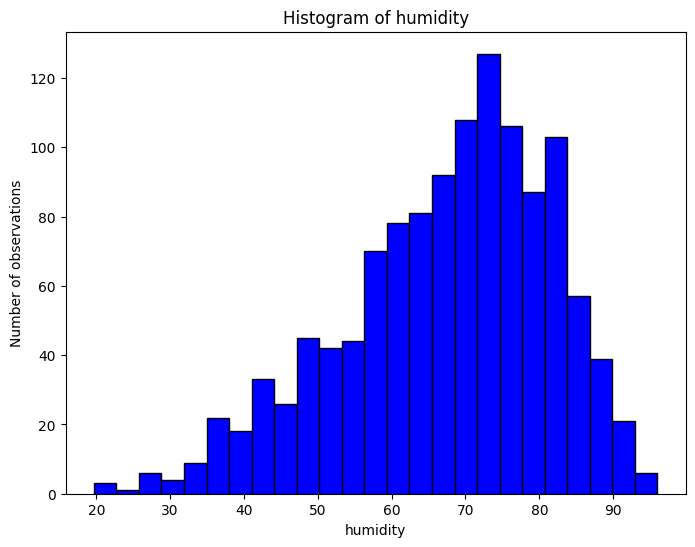

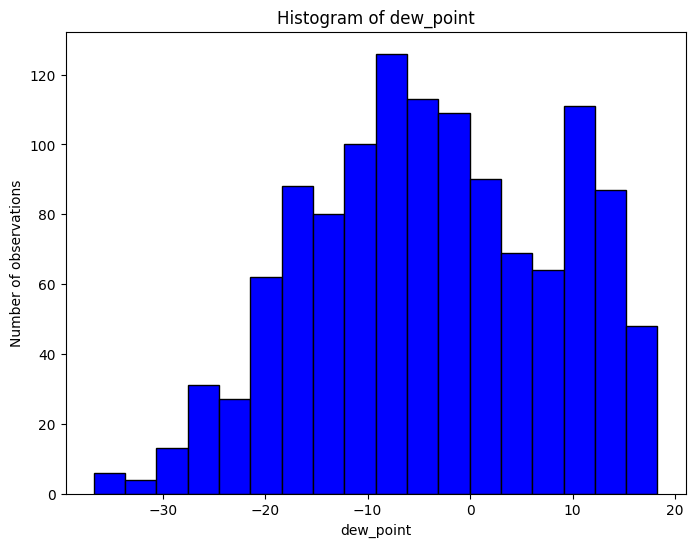

In [70]:
features = ["temperature", "station_level_pressure", "sea_level_pressure", "humidity", "dew_point"]

for feature in features:
    feature_range = int(abs(data[feature].min() - data[feature].max()))

    plt.figure(figsize=(8, 6))
    plt.hist(data[feature], color='blue', edgecolor='black',
             bins=int(feature_range/3))

    plt.title(f'Histogram of {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Number of observations')
    plt.show()

### Корреляция признаков

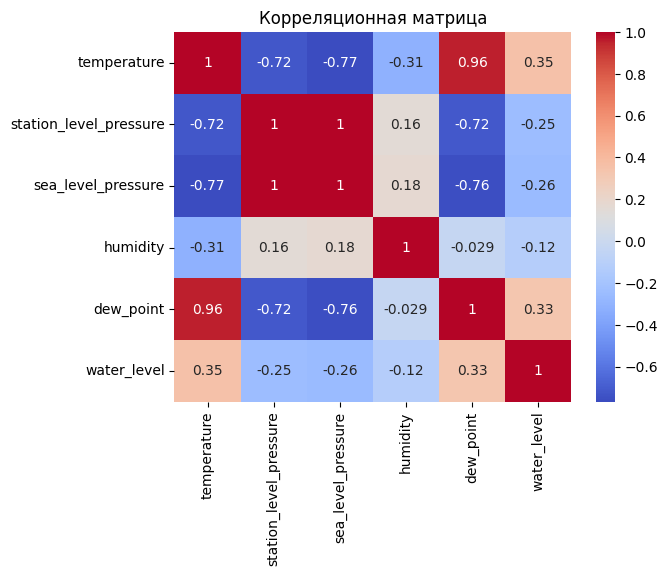

In [9]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()